# Introduction to Neural Networks

Neural networks are becoming increasingly more popular and are responsible for some of the most cutting edge advancements in data science including image and speech recognition. They have also been transformative in reducing the need for intensive and often time intensive feature engineering needed for traditional supervised learning tasks. In this lesson, we'll investigate the architecture of neural networks.

The most basic neural networks are single-layer densely connected neural networks, which have very similar properties as logistic regression models

Compared to more traditional statistics and ML techniques, neural networks perform particularly well when using unstructured data

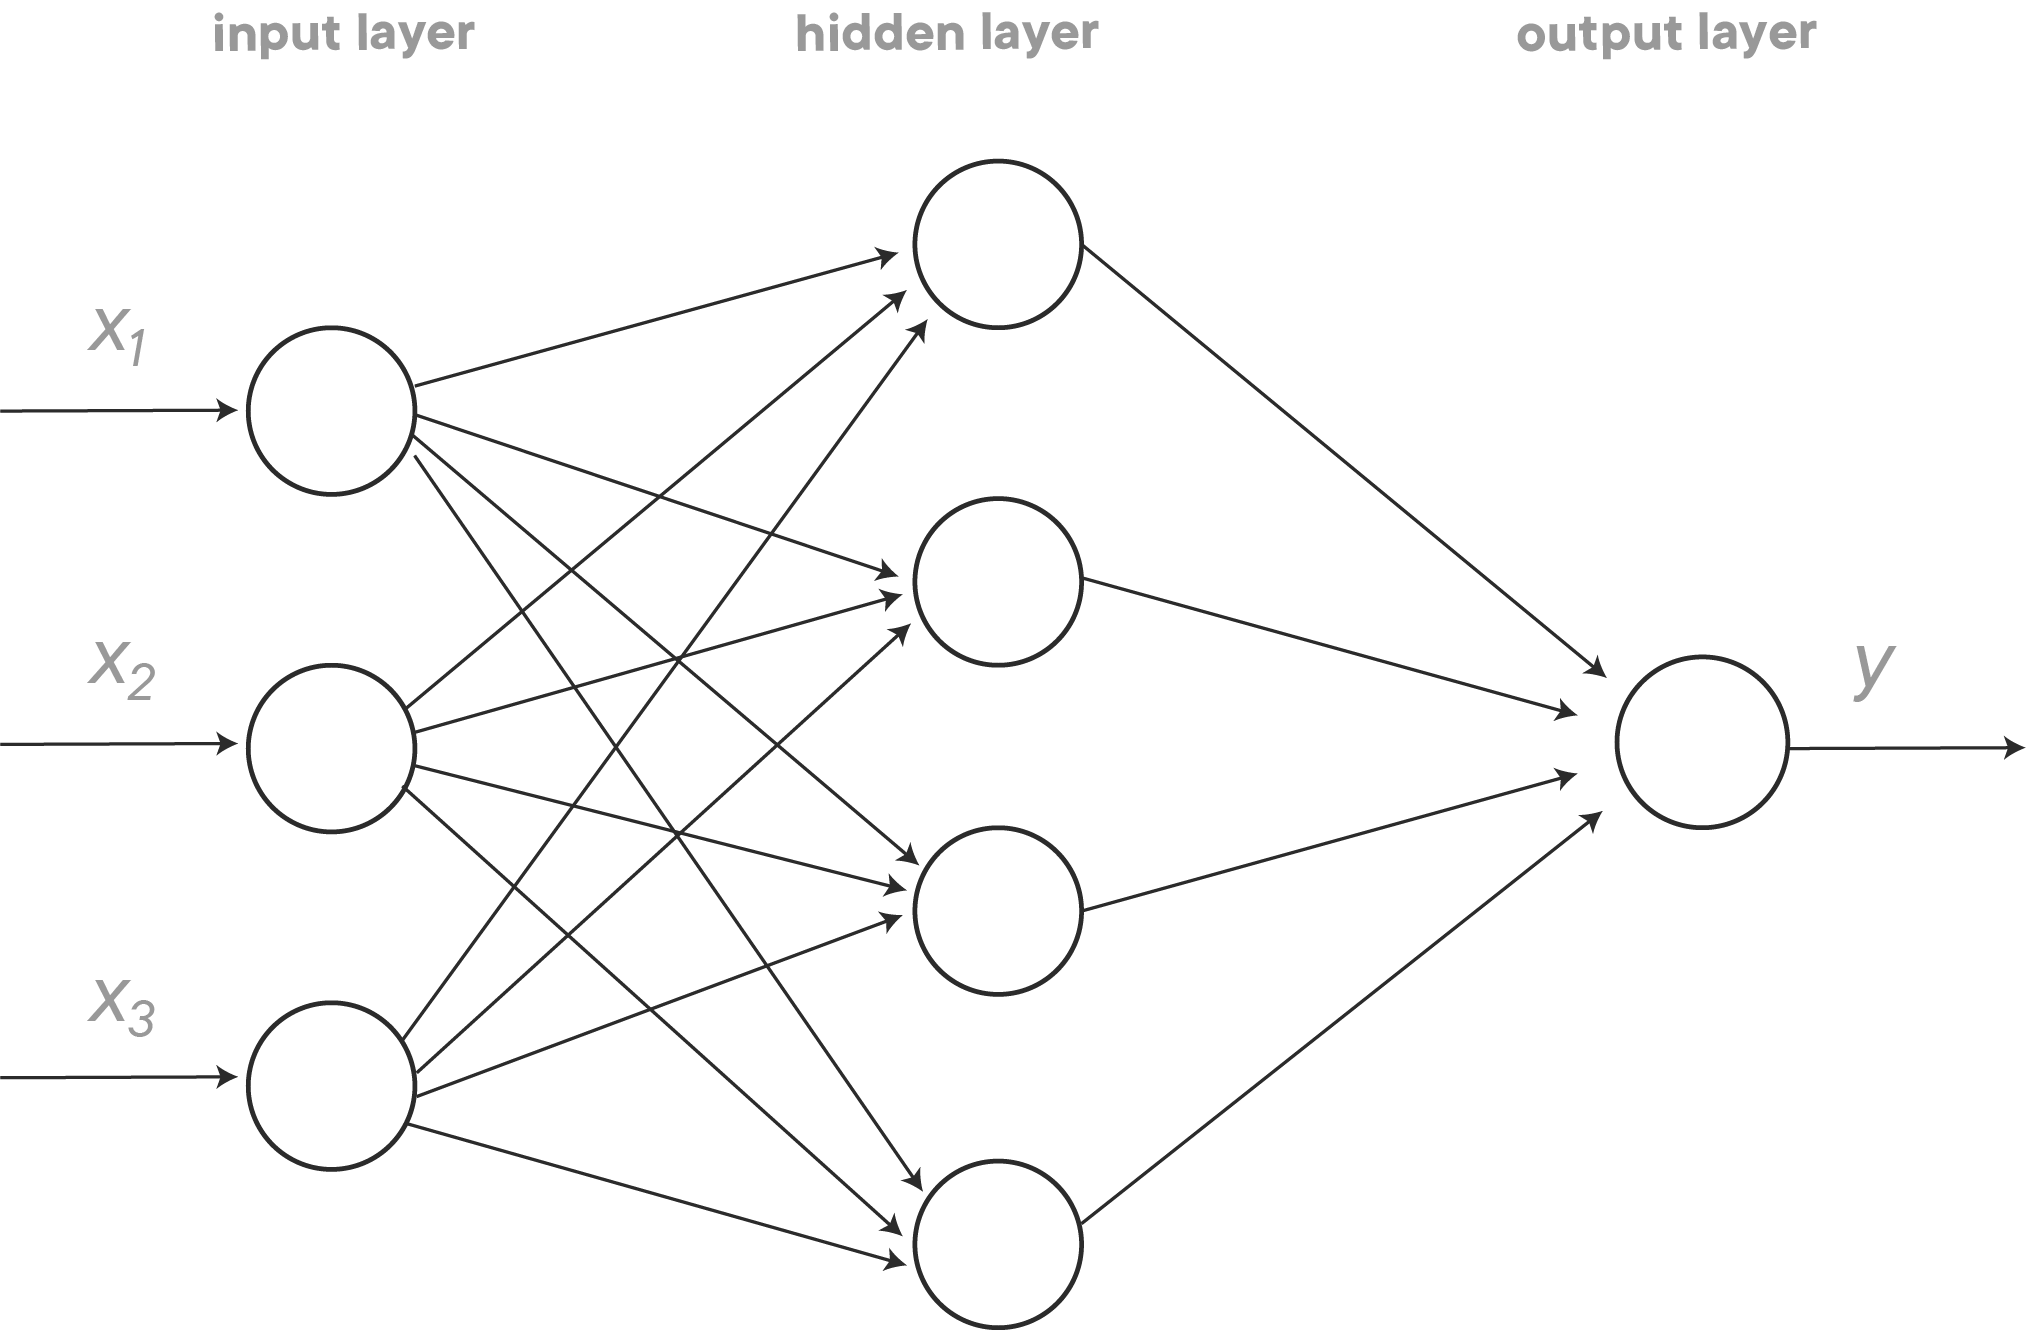

**Types of neural networks:**
- Standard neural networks
- Convolutional neural networks (input = images, video)
- Recurrent neural networks (input = audio files, text, time series data)
- Generative adversarial networks

The **loss function** is used to measure the inconsistency between the predicted value $(\hat y)$ and the actual label $y$.

Neural networks use loss and cost functions to minimize the "loss", which is a function that summarizes the difference between the actual outcome (eg. pictures contain Santa or not) and the model prediction (whether the model correctly identifies pictures with Santa)

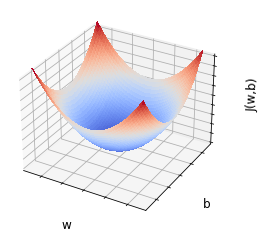

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Generate data
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = X**2+ Y**2 + 6

# Plot the surface
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0, 50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('w', fontsize=12)
ax.set_ylabel('b', fontsize=12)
ax.set_zlabel('J(w,b)', fontsize=12)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

plt.show()

> The cost function takes a convex form, looking much like this plot here! The idea is that you'll start with some initial values of $w$ and $b$, and then gradient descent, as you've seen before, takes a step in the steepest direction downhill.

Backward and forward propagation are used to estimate the so-called "model weights"

Adding more layers to neural networks can substantially increase model performance

### Steps Taken To Build a Neural Network with Keras
- Importing the packages
- Decide on the network architecture `model = models.Sequential()`
- Add layers `model.add(layers.Dense(units, activation, input_shape))`
- Compile The Model `model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])`
- Train The Model `history = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))`
- Plot `history.history['loss']`
- Make Predictions `y_hat = model.predict(x)`
- Evaluate the Model `model.evaluate(X_test, X_test_labels)`

### Activation functions

The **`sigmoid function`** is nearly always the go-to in the output layer of a binary classification problem, but in hidden layers (outputs activation values somewhere between 0 and 1.)

The **`hyperbolic tangent (or tanh) function`** goes between -1 and +1, and is in fact a shifted version of the sigmoid function.The means of the activations coming out are closer to zero! A disadvantage of both tanh and sigmoid activation functions is that when $z$ gets quite large or small, the derivative of the slopes of these functions become very small, generally 0.0001. This will slow down gradient descent. You can see in the tanh plot that this already starts happening for values of $z > 2$ or $z < 2$.

The **`inverse tangent (arctan) function`** has a lot of the same qualities that tanh has, but the range roughly goes from -1.6 to 1.6, and  the slope is more gentle than the one we saw using the tanh function.

**`The RectifiedLinear Unit Function (ReLU)`**: This is probably the most popular activation function, along with the tanh! The fact that the activation is exactly 0 when $z <0$  is slightly cumbersome when taking derivatives though.

The **`leaky ReLU`** solves the derivative issue by allowing for the activation to be slightly negative when $z <0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f

def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f

def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f

def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)

z = np.arange(-10, 10, 0.2)

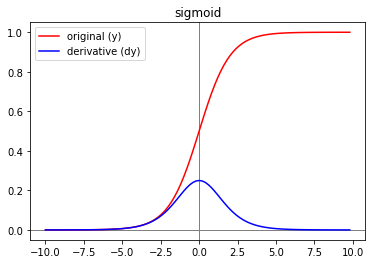

In [3]:
y = sigmoid(z)
dy = sigmoid(z, derivative=True)
plt.title('sigmoid')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

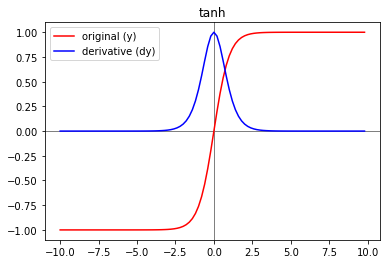

In [4]:
y = tanh(z)
dy = tanh(z, derivative=True)
plt.title('tanh')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend()

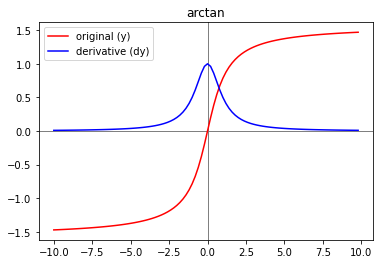

In [5]:
y = arctan(z)
dy = arctan(z, derivative = True)
plt.title('arctan')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

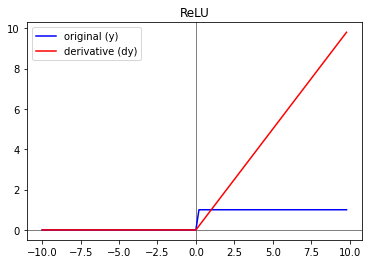

In [6]:
plt.title('ReLU')
y = relu(z)
dy = relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, dy, 'b', label='original (y)')
plt.plot(z, y, 'r', label='derivative (dy)')
plt.legend();

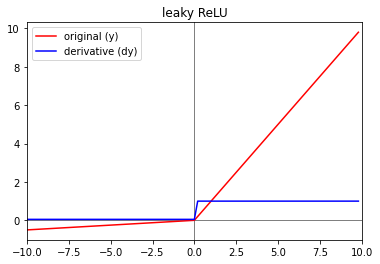

In [7]:
# the default leakage here is 0.05!
y = leaky_relu(z)
dy = leaky_relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.title('leaky ReLU')
plt.xlim(-10,10)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

## Additional Resources

- https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f

- https://playground.tensorflow.org/

- https://keras.io/getting-started/
 
- https://keras.io/getting-started/sequential-model-guide/#compilation

- https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop

- https://www.coursera.org/learn/deep-neural-network/lecture/qcogH/mini-batch-gradient-descent

- A full book on Keras by the author of Keras himself: https://www.manning.com/books/deep-learning-with-python

- [Visualising activation functions in neural networks](https://dashee87.github.io/data%20science/deep%20learning/visualising-activation-functions-in-neural-networks/)